In [39]:
import pandas as pd  
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [40]:
df.shape

(48895, 16)

In [41]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [42]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [43]:
df[['last_review','reviews_per_month']] = df[['last_review','reviews_per_month']].fillna(0)

In [44]:
df.isna().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [45]:
df.dropna(inplace=True)

In [46]:
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [47]:
df = df.drop(['id','name','host_id','host_name','last_review'],axis=1)

In [48]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [49]:
df.price.describe()

count    48858.000000
mean       152.740309
std        240.232386
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [50]:
min_threshold,max_threshold = df.price.quantile([0.0015,0.995])
min_threshold,max_threshold

(20.0, 1000.0)

In [51]:
df[df.price<min_threshold]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2860,Manhattan,East Village,40.73051,-73.98140,Entire home/apt,10,30,0,0.00,4,137
3950,Brooklyn,Bedford-Stuyvesant,40.68948,-73.93528,Private room,18,1,0,0.00,1,0
4647,Manhattan,Upper East Side,40.76866,-73.95553,Entire home/apt,16,2,21,1.69,1,9
5542,Manhattan,Washington Heights,40.83456,-73.94344,Private room,16,14,0,0.00,1,0
8169,Manhattan,SoHo,40.72340,-73.99967,Entire home/apt,16,3,3,0.16,1,0
8270,Manhattan,Harlem,40.82159,-73.95013,Private room,16,2,43,1.66,3,154
19922,Brooklyn,Cypress Hills,40.68313,-73.87077,Shared room,19,2,76,2.40,6,120
20992,Brooklyn,Bushwick,40.68994,-73.91556,Entire home/apt,11,2,113,3.86,1,261
21281,Manhattan,Financial District,40.70588,-74.01590,Entire home/apt,12,300,0,0.00,1,0
21700,Manhattan,Harlem,40.81302,-73.95349,Shared room,10,1,0,0.00,1,0


In [52]:
df[df.price>max_threshold]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
496,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,0.33,11,0
762,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300,5,28,0.31,4,297
946,Manhattan,Upper West Side,40.80142,-73.96931,Private room,3000,7,0,0.00,1,365
1105,Manhattan,Lower East Side,40.72152,-73.99279,Private room,1300,1,0,0.00,1,0
1480,Manhattan,Upper West Side,40.77516,-73.98573,Entire home/apt,2000,30,59,0.71,11,364
...,...,...,...,...,...,...,...,...,...,...,...
48080,Manhattan,SoHo,40.72060,-74.00023,Entire home/apt,1308,2,0,0.00,1,179
48304,Manhattan,Hell's Kitchen,40.75533,-73.99866,Entire home/apt,2999,30,0,0.00,1,222
48305,Manhattan,Upper East Side,40.78132,-73.95262,Entire home/apt,1999,30,0,0.00,1,270
48523,Brooklyn,Bedford-Stuyvesant,40.68767,-73.95805,Entire home/apt,1369,1,0,0.00,1,349


In [53]:
df_2 = df[(df.price<max_threshold)&(df.price>min_threshold)]
df_2.shape

(48473, 11)

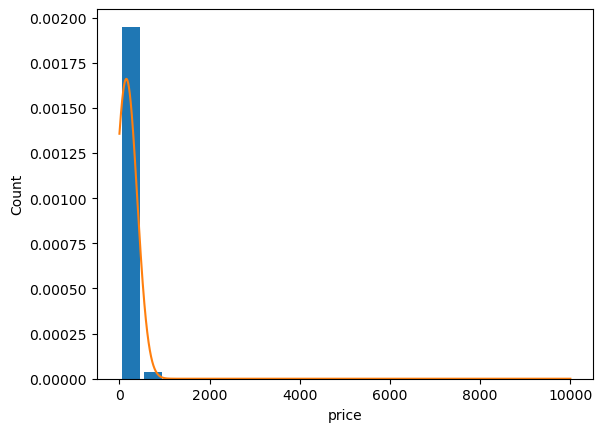

In [54]:
import matplotlib.pyplot as plt 
from scipy.stats import norm 

plt.hist(df.price,bins=20,rwidth=0.8,density=True)
plt.xlabel('price')
plt.ylabel('Count')
import numpy as np  
rng = np.arange(df.price.min(),df.price.max(),0.1)
plt.plot(rng,norm.pdf(rng,df.price.mean(),df.price.std()))


In [55]:
upper_limit = df.price.mean()+3*df.price.std()
upper_limit

873.4374652251031

In [56]:
lower_limit = min_threshold
lower_limit

20.0

New csv

In [57]:
bang_data = pd.read_csv('bhp.csv')
bang_data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [58]:
bang_data.isna().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

Text(0.5, 1.0, 'Price per sqft Distribution')

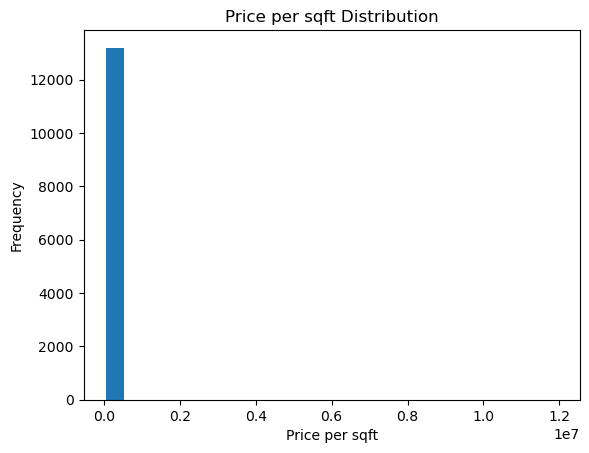

In [59]:
plt.hist(bang_data.price_per_sqft,bins=20,rwidth=0.8)
plt.xlabel('Price per sqft')
plt.ylabel('Frequency')
plt.title('Price per sqft Distribution')

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bang_data['price_per_sqft'] = scaler.fit_transform(bang_data[['price_per_sqft']])

Text(0.5, 1.0, 'Price per sqft Distribution')

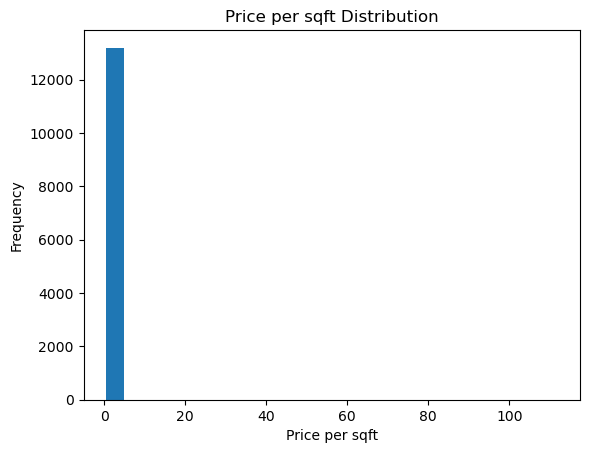

In [61]:
plt.hist(bang_data.price_per_sqft,bins=20,rwidth=0.8)
plt.xlabel('Price per sqft')
plt.ylabel('Frequency')
plt.title('Price per sqft Distribution')